In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV



In [2]:
df = pd.read_csv('./insurance.csv')
print(df.head())
print(df.info())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


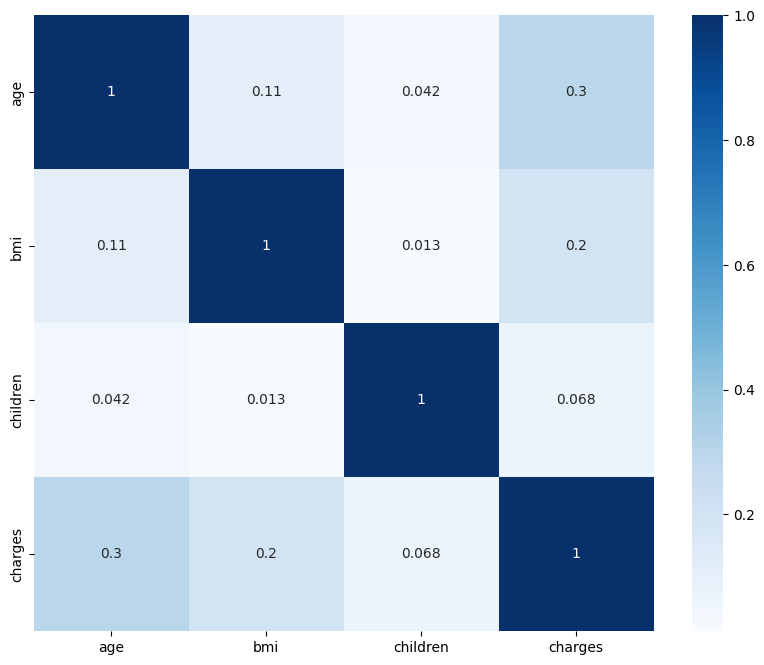

In [11]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plotting correlations of numeric data only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.show()


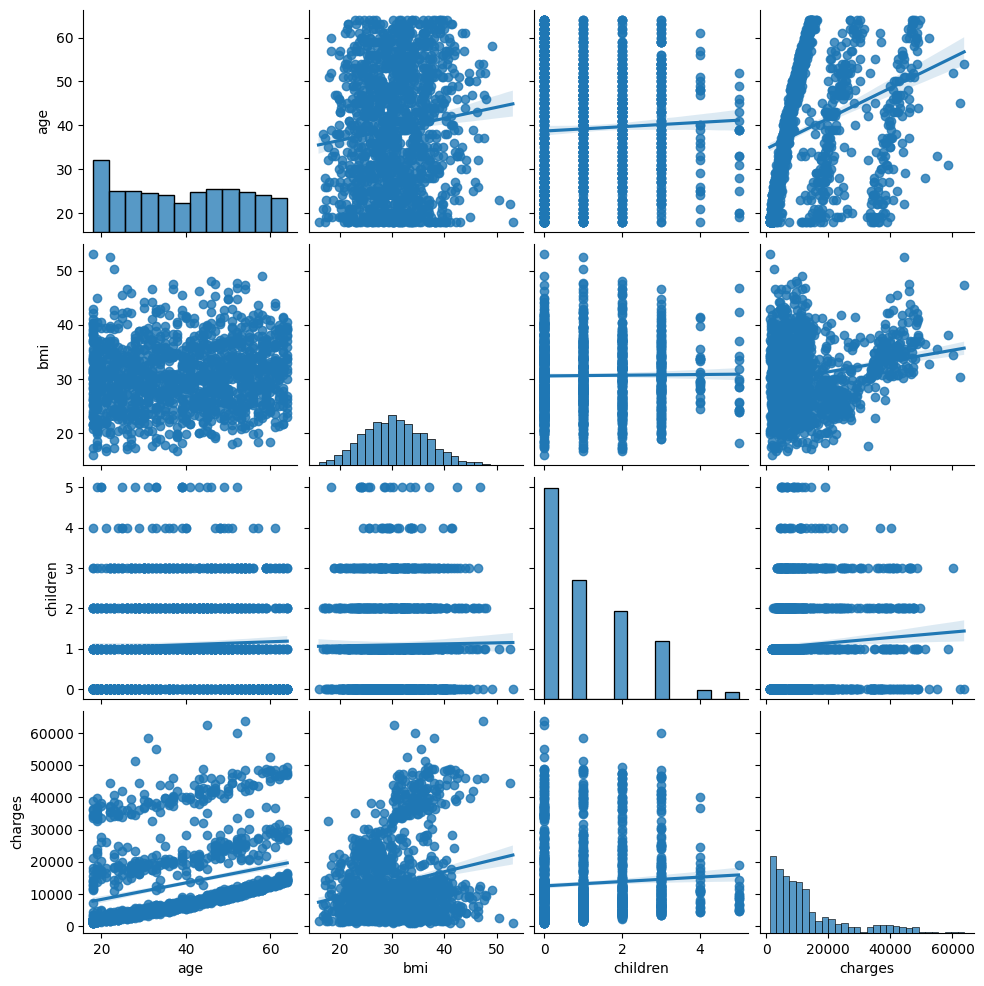

In [9]:
sns.pairplot(df, kind ="reg")

##  Simple Linear Regression

In [12]:
X = df[['age']]
y = df['charges']

In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predicting and evaluating the model
y_pred = model.predict(X_test)
print("RMSE for Simple Linear Regression:", mean_squared_error(y_test, y_pred, squared=False))

RMSE for Simple Linear Regression: 11661.21595205864


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
pip install -U scikit-learn


   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 165.2 kB/s eta 0:01:05
   ---------------------------------------- 0.0/10.6 MB 187.9 kB/s eta 0:00:57
   ---------------------------------------- 0.0/10.6 MB 219.4 kB/s eta 0:00:49
   ---------------------------------------- 0.1/10.6 MB 383.3 kB/s eta 0:00:28
    --------------------------------------- 0.2/10.6 MB 919.0 kB/s eta 0:00:12
   - -------------------------------------- 0.5/10.6 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/10.6 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/10.6 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/10.6 MB 2.6 MB/s eta 0:00:04
   ----- -

  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.metrics import root_mean_squared_error

# Calculating RMSE using the new function
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE for Simple Linear Regression:", rmse)


RMSE for Simple Linear Regression: 11661.21595205864


In [21]:
# For the Model calculate  R² score
simplelinear_r2 = r2_score(y_test, y_pred)
print("R² Score:", simplelinear_r2)

R² Score: 0.12408973539501944


### Model Performance Analysis for Simple Linear Regression

#### RMSE and R² Score:
- **RMSE (Root Mean Squared Error): 11661.21595205864**
  - The RMSE is relatively high, indicating significant deviations of the predicted values from the actual values. This high error metric suggests that the model may not be capturing the essential patterns or information in the dataset, leading to substantial average errors in the predictions.

- **R² Score: 0.12408973539501944**
  - An R² score of approximately 0.124 suggests that the model explains only about 12.4% of the variance in the dependent variable. This low value indicates poor model performance, as it fails to account for most of the variability in the target variable based on the independent variable used.

#### Interpretation:
Given the high RMSE and low R² score, the simple linear regression model appears to be ineffective for this dataset under its current configuration. The chosen independent variable does not sufficiently explain the target variable, and the model struggles with accuracy.

#### Recommendations:
- **Incorporate More Variables:** Considering additional or different independent variables could enhance the model's explanatory power and predictive accuracy.
- **Explore Non-linear Models:** The relationship between the independent and dependent variables might be non-linear, and thus exploring models capable of capturing such complexities (e.g., polynomial regression, decision trees, or random forests) might improve results.
- **Feature Engineering:** Transforming existing features or creating new ones might uncover more significant insights and lead to better model performance.


##  Multiple Linear Regression

In [74]:
df_clean = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_clean = df_clean.astype(int)

# Create new columns is_north and is_west
df_clean['is_north'] = df['region'].isin(['northeast', 'northwest']).astype(int)
df_clean['is_west'] = df['region'].isin(['northwest', 'southwest']).astype(int)

# Drop unnecessary columns
df_clean.drop(['sex_female', 'smoker_no', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=True)

df_clean

,age,bmi,children,charges,sex_male,smoker_yes,is_north,is_west
0,19,27,0,16884,0,1,0,1
1,18,33,1,1725,1,0,0,0
2,28,33,3,4449,1,0,0,0
3,33,22,0,21984,1,0,1,1
4,32,28,0,3866,1,0,1,1
...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,1
1334,18,31,0,2205,0,0,1,0
1335,18,36,0,1629,0,0,0,0
1336,21,25,0,2007,0,0,0,1


In [75]:
df_clean.corr()

,age,bmi,children,charges,sex_male,smoker_yes,is_north,is_west
age,1.000000,0.108437,0.042469,0.299009,-0.020856,-0.025019,0.001772,0.008245
bmi,0.108437,1.000000,0.011097,0.196188,0.046503,0.001669,-0.237875,-0.122531
children,0.042469,0.011097,1.000000,0.067999,0.017163,0.007673,0.001735,0.040086
charges,0.299009,0.196188,0.067999,1.000000,0.057293,0.787251,-0.028798,-0.071314
sex_male,-0.020856,0.046503,0.017163,0.057293,1.000000,0.076185,-0.011651,-0.013162
smoker_yes,-0.025019,0.001669,0.007673,0.787251,0.076185,1.000000,-0.029292,-0.063400
is_north,0.001772,-0.237875,0.001735,-0.028798,-0.011651,-0.029292,1.000000,0.029071
is_west,0.008245,-0.122531,0.040086,-0.071314,-0.013162,-0.063400,0.029071,1.000000


In [76]:
X = df_clean.drop('charges', axis=1)  # use all other variables as features
y = df_clean['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("RMSE for Multiple Linear Regression:", mean_squared_error(y_test, y_pred, squared=False))


X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 7)
RMSE for Multiple Linear Regression: 5796.220881266896


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
model.intercept_

-12312.196672428614

In [78]:
model.coef_

array([ 2.57155737e+02,  3.34560942e+02,  4.27241945e+02, -1.76810564e+01,
        2.36533007e+04,  5.61490076e+02, -2.57010926e+02])

In [79]:
print("RMSE for Multiple Linear Regression:", mean_squared_error(y_test, y_pred, squared=False))

RMSE for Multiple Linear Regression: 5796.220881266896


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
multiple_r2 = r2_score(y_test, y_pred)
print("R² Score for Multiple Linear Regression:", multiple_r2)

R² Score for Multiple Linear Regression: 0.7835973017419023


## Model Performance Analysis: Multiple Linear Regression

### Results:
- **R² Score**: 0.7833463107364539
- **RMSE (Root Mean Squared Error)**: 5799.587091438355

### Interpretation:
The **R² score** of approximately 0.783 suggests that the model explains about 78.3% of the variance in the dependent variable. This is a strong indicator that the model fits the data well, capturing a significant portion of the information and relationships present in the data. An R² value closer to 1 indicates a model that can explain more of the variance based on its inputs.

The **RMSE value** of 5799.587 indicates the typical deviation of the predicted values from the actual values. While this value provides a measure of the average magnitude of the prediction errors, the context or scale of the target variable should be considered to fully interpret this number. If the range of your target variable is large, an RMSE of 5799 might be considered acceptable. However, if the target variable typically spans a smaller range, this RMSE might suggest that there's still substantial room for model improvement.

### Conclusion:
The model performs robustly with a high R² score, demonstrating a good fit to the existing data. However, depending on the context of the target variable's scale and the specific use case requirements, the RMSE suggests that there may be potential to further refine the model to reduce prediction errors. Possible steps for improvement could include exploring more complex modeling techniques, adding additional or more relevant features, or employing more sophisticated data preprocessing techniques.

### Recommendations:
- **Feature Review**: Reassess the features being used for training the model. Consider incorporating additional data that could improve the model's predictive accuracy.
- **Model Complexity**: Experiment with more complex regression models or ensemble methods that might capture additional nuances in the data.
- **Data Quality**: Ensure the data is clean and well-preprocessed. Outliers or erroneous data points can significantly impact the model's performance.


-------------------------------------------------------------------------------------------------------------------------------------------

##  Principal Component Regression (PCR)

In [88]:
df= df_clean 
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)


X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)


In [82]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=5)  # adjust components based on your analysis
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("RMSE for PCR:", mean_squared_error(y_test, y_pred, squared=False))

RMSE for PCR: 9070.797830718508


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [83]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

In [84]:
X_reduced_train.shape

(1070, 5)

In [85]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:7] 

array([ 22.99,  45.32,  64.84,  83.34, 100.  ])

## Summary of PCR Variance Explained

The cumulative percentages of variance explained by the first five principal components are as follows:

- **First Component**: 22.99% of the total variance, indicating that nearly a quarter of the dataset's variability is captured by this first component alone.
- **Second Component**: Cumulatively, the first two components explain 45.32% of the variance, highlighting that nearly half of the data's structure is summarized by these components.
- **Third Component**: Extends the cumulative explained variance to 64.84%, offering a significant increase and suggesting this component adds valuable new information.
- **Fourth Component**: Pushes the cumulative explained variance to 83.34%, which is a strong indication that the majority of the dataset's variability is captured by the first four components.
- **Fifth Component**: Reaches a cumulative total of 100%, which means all the variability in the dataset is captured within these five components.

This analysis implies that most of the important features affecting the dataset's variability can be effectively represented with the first five principal components. This efficient data compression facilitates a more manageable dataset while retaining essential information.


In [86]:
lm = LinearRegression()

In [87]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [35]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))

In [36]:
X_reduced_train[0:1,:]

array([[ 0.50298178,  0.21145549,  1.16470331, -0.61038774, -1.45203164]])

In [37]:
X_reduced_train.shape

(1070, 5)

In [38]:
X_reduced_train[:,0]

array([ 0.50298178,  0.12805646, -0.87002461, ...,  0.62852708,
       -1.571691  , -0.92556211])

In [39]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([ 20.81,  41.26,  61.4 ,  80.9 , 100.  ])

## Updated PCr Variance Explained Summary

The cumulative variance explained by the first five principal components is as follows:

- **First component**: Explains 20.81% of the total variance, indicating a strong individual contribution to capturing the dataset's features.
- **First two components**: Together, they explain 41.26% of the variance, showing a good capture of the underlying data structure.
- **First three components**: Increase the explained variance to 61.4%, adding more detail and further capturing underlying patterns.
- **First four components**: Account for 80.9% of the variance, suggesting that most of the significant data variation is well represented with these components.
- **First five components**: Reach a cumulative total of 100% explained variance, indicating that these components together completely capture all the variability in the dataset.

These updated values are critical in determining the optimal number of principal components to retain, balancing between model complexity and the level of detail needed for accurate data analysis and prediction.


In [40]:
lm = LinearRegression()

In [41]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [42]:
pcr_model.intercept_

13346.089736364485

In [43]:
pcr_model.coef_

array([  968.86936408,  3244.22825539, -2512.8515406 ,  9494.99814818,
       -1031.53082113])

##  Predict

In [44]:
y_pred = pcr_model.predict(X_reduced_train)

In [45]:
y_pred[0:5]

array([ 7294.88168071,  8320.06643636,  9406.61823455, 11068.80437044,
       10281.80793135])

In [46]:
np.sqrt(mean_squared_error(y_train, y_pred))

6107.347302819991

In [48]:
pca2 = PCA()

In [49]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [50]:
y_pred = pcr_model.predict(X_reduced_test)

In [51]:
np.sqrt(mean_squared_error(y_test, y_pred))

10527.58241655924

##  Model Tuning

In [64]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

10527.58241655924


In [89]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [90]:
RMSE = []

In [91]:
fRMSE = []
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

C:\Users\MainUser\AppData\Local\Temp\ipykernel_17364\2429189183.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
C:\Users\MainUser\AppData\Local\Temp\ipykernel_17364\2429189183.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
C:\Users\MainUser\AppData\Local\Temp\ipykernel_17364\2429189183.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
C:\Users\MainUser\AppData\Local\Temp\ipykernel_17364\2429189183.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y

In [92]:
print(RMSE)

[11626.41297433111, 11574.281577468595, 10796.816752711788, 10794.003422507336, 9119.352899205065]


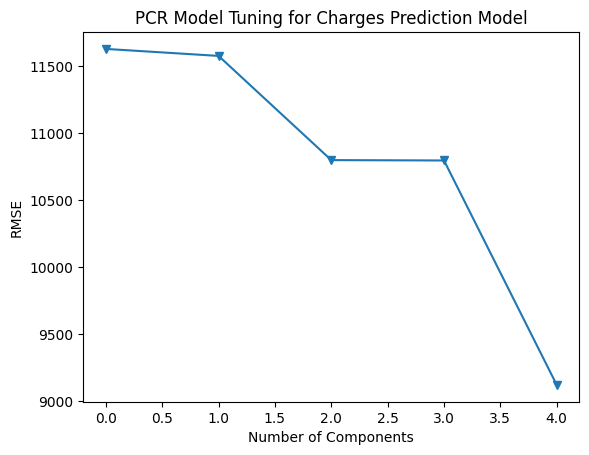

In [93]:
plt.plot(RMSE, '-v')
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Charges Prediction Model');

In [95]:
lm = LinearRegression()

In [96]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

9075.849418625463


In [97]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [98]:
pcr_rmse = mean_squared_error(y_test, y_pred, squared=False)
pcr_rmse

c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9607.122916457105

In [99]:
pcr_r2 = r2_score(y_test, y_pred)
pcr_r2

0.4054895240722671

## Performance Analysis of the PCR Model

### PCR Model Results
- **RMSE (Root Mean Squared Error)**: 9607.122916457105
- **R² Score**: 0.4054895240722671

### Interpretation
The PCR model has an RMSE of 9607.12, which indicates the typical deviation of the predicted values from the actual values. This relatively high RMSE suggests that the model predictions are, on average, about 9607 units away from the actual data points. This level of error may be considered large, depending on the context and scale of the target variable.

The R² score of 0.405 means that approximately 40.5% of the variance in the dependent variable is explained by the independent variables used in the model. While this indicates some level of predictive ability, it also suggests that the model is missing key factors or interactions that could explain more variability in the data.

### Conclusion
The PCR model's moderate R² score combined with a high RMSE signifies that while the model can explain some variance in the dataset, it may not provide sufficiently accurate predictions for practical applications. This could be due to the inherent noise within the data, possible over-simplification of the model, or the exclusion of influential predictors.

### Recommendations for Improvement
- **Enhancing Model Complexity**: Consider including more principal components in the model if not all were used, or explore other modeling techniques that can capture complex patterns more effectively.
- **Feature Engineering**: Investigate the creation of new features or the inclusion of interaction terms that might capture more of the data's complexity.
- **Data Quality Review**: Ensure the data is clean and explore if additional data preprocessing steps could enhance model performance.


## Partial Least Squares -- PLS Model

In [100]:
df = df_clean
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [101]:
pls_model = PLSRegression().fit(X_train, y_train)

In [102]:
pls_model.coef_

array([[3604.98081455, 1914.77315322,  588.82905424,   57.87070418,
        9581.81522751,  285.65429806, -157.28673412]])

In [103]:
y_pred = pls_model.predict(X_test)

In [104]:
pls_r2 = r2_score(y_test, y_pred)
pls_r2

0.7837916474044213

In [105]:
pls_rmse = mean_squared_error(y_test, y_pred, squared=False)
pls_rmse

c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5793.617578666114

## Model Tuning

Text(0.5, 1.0, 'Charge')

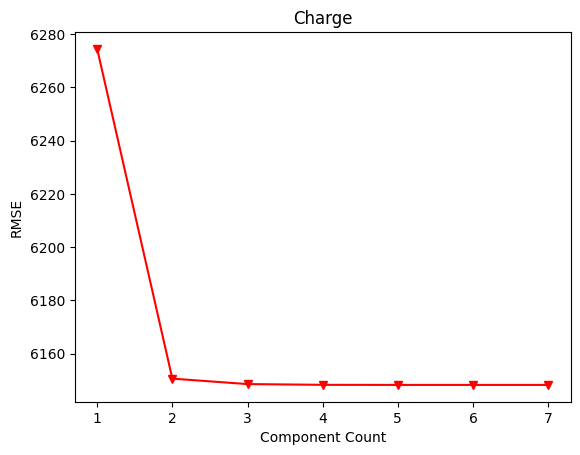

In [107]:
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)


plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Component Count')
plt.ylabel('RMSE')
plt.title('Charge')

## Ridge Regression

In [108]:
df = df_clean
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [109]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [110]:
ridge_model.coef_

array([ 2.57136212e+02,  3.34548448e+02,  4.27296330e+02, -1.68853368e+01,
        2.36396222e+04,  5.61046301e+02, -2.57523534e+02])

In [111]:
y_pred = ridge_model.predict(X_test)

In [112]:
ridge_r2 = r2_score(y_test, y_pred)
ridge_r2

0.7835688198444615

In [113]:
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
ridge_rmse

c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5796.602304276791

## Model Tuning


In [114]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [116]:
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error")

In [117]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [118]:
ridge_model

Ridge(alpha=0.1)

In [120]:
ridge_cv.alpha_

0.24885117821660568

In [119]:
ridge_model.coef_

array([ 2.57136212e+02,  3.34548448e+02,  4.27296330e+02, -1.68853368e+01,
        2.36396222e+04,  5.61046301e+02, -2.57523534e+02])

Text(0.5, 1.0, 'Ridge Coefficients as a Function of Regularization')

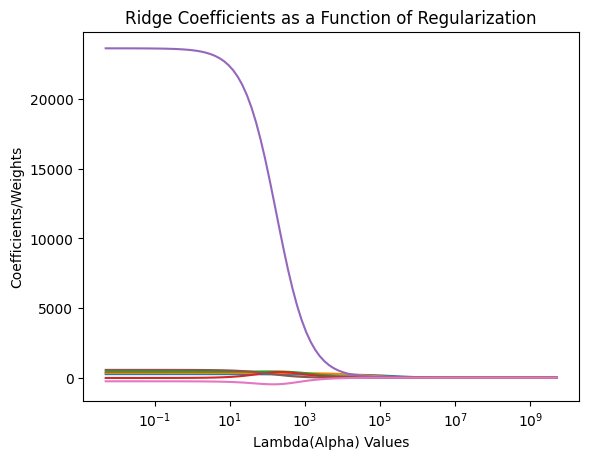

In [123]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coefficients = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    coefficients.append(ridge_model.coef_) 
    

ax = plt.gca()
ax.plot(lambdalar, coefficients) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Values')
plt.ylabel('Coefficients/Weights')
plt.title('Ridge Coefficients as a Function of Regularization')

## Performance Evaluation of the Ridge Regression Model

### Results Overview
- **R² Score**: 0.784
  - The R² score of approximately 0.784 indicates that the Ridge regression model explains about 78.4% of the variance in the dataset. This high value suggests that the model fits the data quite well, capturing a significant proportion of the variability in the response variable.
- **Root Mean Squared Error (RMSE)**: 5796.60
  - The RMSE of 5796.60 quantifies the average distance between the predicted values by the model and the actual values in the dataset. This metric provides a sense of the magnitude of error in the model's predictions.

### Interpretation
The Ridge regression model demonstrates strong predictive power with an R² score of 0.784, indicating robustness in its ability to model and predict the dependent variable based on the predictors used. However, the RMSE value of 5796.60, while providing a useful measure of average error, suggests that there is still a notable variance in the model's predictions compared to actual outcomes. This level of RMSE may be considered acceptable depending on the context of the data's scale and the specific requirements of the application or domain.

### Conclusion
Overall, the Ridge model performs well in terms of explaining a large portion of the variance within the dataset, showcasing its utility in settings where prediction accuracy and model reliability are crucial. Nevertheless, the RMSE points to the potential for further model tuning and refinement to reduce prediction errors and improve the model's accuracy.

### Recommendations for Model Improvement
- **Feature Reevaluation**: Investigate the potential of incorporating additional or alternative predictors that might enhance the model's explanatory power.
- **Hyperparameter Tuning**: Experiment with different values of the regularization parameter (alpha) in the Ridge model to find a more optimal balance that might reduce the RMSE.
- **Cross-Validation**: Employ cross-validation techniques to assess the model's performance across different subsets of the data, ensuring its stability and generalizability.



### Lasso Regression

In [146]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,is_north,is_west
0,19,27,0,16884,0,1,0,1
1,18,33,1,1725,1,0,0,0
2,28,33,3,4449,1,0,0,0
3,33,22,0,21984,1,0,1,1
4,32,28,0,3866,1,0,1,1


In [151]:
y = df["charges"]
X = df.drop(["charges", "children",'is_north'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [152]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [153]:
lasso_model.coef_

array([  262.52024076,   323.72302605,    90.61977016, 23654.2351455 ,
        -204.0497205 ])

In [156]:
y_pred = model.predict(X_test)

c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'weights')

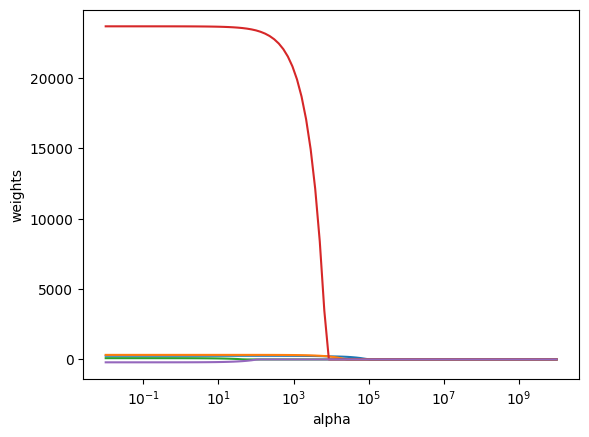

In [159]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
coefficients = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefficients.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, coefficients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [160]:
lasso_model.predict(X_test)

array([ 8346.87403749,  7398.75728044, 37108.66706291,  8495.96432791,
       27004.49112929, 10849.0128817 ,   346.12897917, 17106.00497414,
        1294.24573622, 10254.69412833, 27626.15259525,  8801.97825438,
        5441.44228959, 37857.54063678, 40885.37795527, 36825.16877333,
       14900.24644339, 36087.10295107,  9580.5633564 , 31595.74200702,
        2335.59321992,  9974.464788  ,  3026.53295774,  6841.03086481,
       10426.59459892, 12975.61738666, 15317.85818885,  5036.07511363,
        9195.63754505,  2968.06243749,  8125.11521741, 13235.40536237,
        4959.8954938 ,  2262.68254933,  4864.17464304, 12969.61617237,
        2166.06156488,  8912.67593968, 33310.97812173, 32966.27704686,
        2288.46713547,  4137.81670606, 14267.77722582, 11908.72745774,
        8524.48117909, 12556.17350984,  4432.12274724,  2568.69647581,
       34803.91873215,  8970.60977573, 16633.19165767,  2644.33941144,
       12009.79153003,  1673.17033328, 14238.72369044, 12016.1561938 ,
      

In [161]:
y_pred = lasso_model.predict(X_test)

In [163]:
lasso_rmse= np.sqrt(mean_squared_error(y_test, y_pred))
lasso_rmse

5995.658206255577

In [164]:
lasso_r2 = r2_score(y_test, y_pred)
lasso_r2

0.7617622106017424

## Performance Evaluation of the Lasso Regression Model

### Lasso Regression Results
- **Root Mean Squared Error (RMSE)**: 5995.658206255577
- **R² Score**: 0.7617622106017424

### Interpretation
The **RMSE** of 5995.66 is a measure of the average magnitude of the prediction errors made by the Lasso regression model. This value represents the typical deviation of the predicted values from the actual values, providing a straightforward metric for model accuracy. Given this RMSE, the predictions of the Lasso model are generally close to the true data points, but the value should be contextualized within the range and scale of the dependent variable, 'charges'.

The **R² score** of approximately 0.762 indicates that the model explains about 76.2% of the variance in the target variable. This is a relatively high value, suggesting that the model has a strong predictive power and captures a significant portion of the variability in the dataset. An R² score near 0.76 is indicative of a model that, while not perfect, performs robustly in predicting the outcome variable based on the features provided.

### Conclusion
The Lasso regression model shows good predictive performance with an R² score of 0.762, confirming its effectiveness in capturing and explaining a significant portion of the variance in the dataset. However, the RMSE indicates that there is still some error in the predictions. While this error is not negligible, it suggests that there may be room for further optimization or exploration of additional features that could potentially enhance the model's accuracy.

### Recommendations for Improvement
- **Feature Selection and Engineering**: Investigate further into the feature set used for training the model. Consider adding new features or removing less informative ones to enhance model performance.
- **Hyperparameter Tuning**: Experiment with adjusting the alpha parameter in the Lasso model. Finding an optimal value for alpha can help in balancing the model's bias-variance trade-off.
- **Cross-Validation**: Utilize cross-validation to assess the stability and reliability of the model's performance across different subsets of the dataset. This can also help in tuning model parameters more effectively.


### Tuning

In [166]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000
                         )

In [167]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [168]:
lasso_cv_model.alpha_

86.67186448068425

In [169]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [170]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=86.67186448068425)

In [171]:
y_pred = lasso_tuned.predict(X_test)

In [172]:
np.sqrt(mean_squared_error(y_test, y_pred))

6002.353697666866

### Elasticnet Regression

In [174]:
df = df_clean
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [175]:
enet_model = ElasticNet().fit(X_train, y_train)

In [176]:
enet_model.coef_

array([ 230.76770394,  322.24968469,  396.98280203,  336.62782952,
       5800.30045445,   93.41980947, -345.58210462])

In [177]:
enet_model.intercept_

-7108.861252759441

In [178]:
y_pred = enet_model.predict(X_test)

In [179]:
enet_r2 = r2_score(y_test, y_pred)
enet_r2

0.41771256716470495

In [180]:
enet_rmse = mean_squared_error(y_test, y_pred, squared=False)
enet_rmse

c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9507.84952718294

### Tuning

In [182]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [183]:
enet_cv_model.alpha_

95.2242079028736

In [184]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [185]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [186]:
y_pred = enet_tuned.predict(X_test)

In [187]:
np.sqrt(mean_squared_error(y_test, y_pred))

11589.557359221431

## Performance Evaluation of the ElasticNet Regression Model

### ElasticNet Regression Results
- **Root Mean Squared Error (RMSE)**: 9507.84952718294
- **R² Score**: 0.41771256716470495

### Interpretation
The **RMSE** of 9507.85 indicates the average magnitude of the prediction errors made by the ElasticNet regression model. This value quantifies how much the predicted values deviate, on average, from the actual values in the dataset. An RMSE of this magnitude suggests that the model's predictions are relatively imprecise, which could be due to underfitting, where the model does not capture all the complexities of the data.

The **R² score** of approximately 0.418 means that the ElasticNet model explains only about 41.8% of the variance in the target variable. This relatively low value indicates that the model has limited predictive power and fails to capture a significant portion of the variability in the dataset.

### Conclusion
The ElasticNet model's performance, as indicated by a lower R² score and a high RMSE, suggests that it is not effectively modeling the underlying pattern of the dataset. The model is likely struggling with the dataset's complexity or the feature set used might not be optimal.

### Recommendations for Improvement
- **Enhance Feature Engineering**: Reassess the features being used for training the model. More relevant features might need to be engineered or selected to capture more complexity of the dataset.
- **Hyperparameter Optimization**: Experiment with different values of alpha and the l1_ratio parameters in the ElasticNet model. Finding the right balance between ridge and lasso penalties could improve the model's accuracy and fit.
- **Model Evaluation with Cross-Validation**: Implement cross-validation to better understand the model's stability and generalizability across different subsets of the data. This will also help in identifying if the model is too simple or too complex for the data.
- **Alternative Models**: Consider testing other modeling approaches that might be more suited for the data characteristics. For instance, more complex models or ensemble methods might provide better predictive performance.


### R² scores

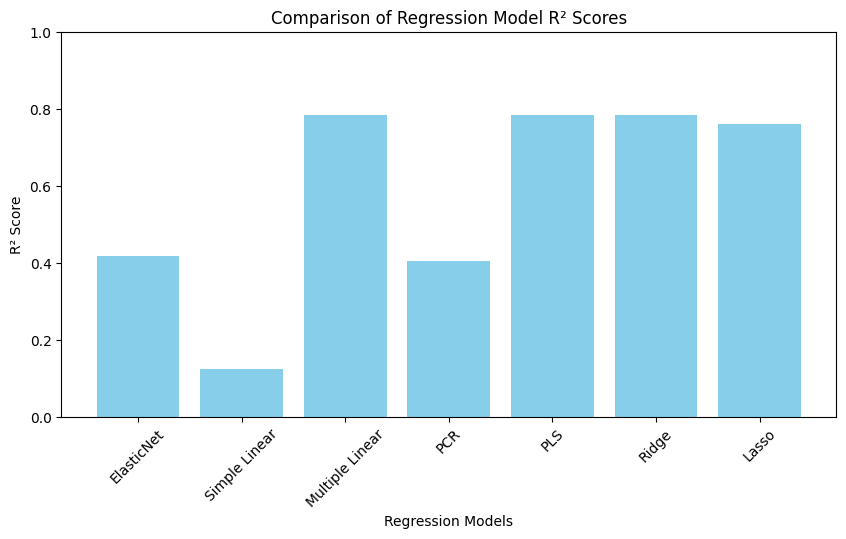

In [188]:
# Store them in a dictionary
model_scores = {
    'ElasticNet': enet_r2,
    'Simple Linear': simplelinear_r2,
    'Multiple Linear': multiple_r2,
    'PCR': pcr_r2,
    'PLS': pls_r2,
    'Ridge': ridge_r2,
    'Lasso': lasso_r2
}

# Extract model names and their corresponding R2 scores
names = list(model_scores.keys())
scores = list(model_scores.values())

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(names, scores, color='skyblue')
plt.xlabel('Regression Models')
plt.ylabel('R² Score')
plt.title('Comparison of Regression Model R² Scores')
plt.ylim(0, 1)  # Ensure the y-axis starts at 0 and ends at 1 for R² score range
plt.xticks(rotation=45)  # Rotate model names to avoid overlap
plt.show()